In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj15.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

1715

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0         Camilo            256
1          Ozuna            236
2       Taburete            156
3    Nil Moliner            154
4       Dua Lipa            125
5         Rels B            119
6  Manuel Turizo            107
7    Danny Ocean            104
8    Chema Rivas             99
9          Beret             90

<AxesSubplot:ylabel='Artist'>

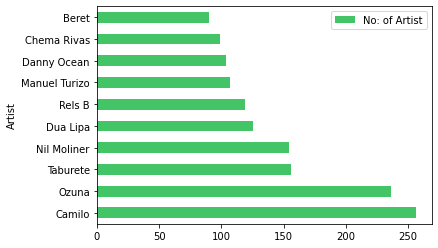

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['Camilo', 'Ozuna', 'Taburete', 'Nil Moliner', 'Dua Lipa', 'Rels B', 'Manuel Turizo', 'Danny Ocean', 'Chema Rivas', 'Beret']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Put A Little Love On Me', 'La photo', 'Similares (feat. Sinsinati)', 'Nina', 'Nina', 'Sin Saber Decir - Sesiones Moraima', 'Una Foto en Blanco y Negro', 'Sin rumbo', 'Somos', 'Sin rumbo', 'Estigma', "C'est Fini", 'Son solo instantes', 'Similares (feat. Sinsinati)', 'Mil Tequilas', 'La Rumba del Tartamudo', 'Cold', 'Similares (feat. Sinsinati)', 'Cold', 'La Rumba del Tartamudo', 'Similares (feat. Sinsinati)', 'Cold', 'La Rumba del Tartamudo', 'Mil Tequilas', 'Babylon Girl', 'Cuando Amanezca (feat. Danny Ocean, Justin Quiles, Feid)', 'Dime tú', 'Detente', 'No Me Despedí', 'Djadja', 'I Warned Myself', 'Put Your Lips', 'Treehouse (feat. Shotty Horroh)', 'Say to You', 'Slow Dance', 'Some Say', 'Lie', 'Si Te Vas/Que Tengo Que Hacer - Original Remix', 'Favorito', 'Nina', 'Resistiré', 'Ahí Va la Niña', 'Despiértame', 'No diré', 'Sin rumbo', 'Nina', 'Nina', 'Sin rumbo', 'Similares (feat. Sinsinati)', 'Cold', 'Mil Tequilas', 'La Rumba del Tartamudo', 'Similares (feat. Sinsinati)', 'Nina', 'Sin

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['5jBtRVMtLZVPVkobDe78Lg', '6YHsM6dbhqtlNUzeX3DX69', '74CBYERIN0oOdZ6x9h2L3R', '6t9ot6JHFylOIfKRRvxIS8', '6t9ot6JHFylOIfKRRvxIS8', '6IZIo1yRDINFdvPShhvks5', '4BNqM0h2wukiQkAUKZjurV', '7GG82mB5Ubtr7GwYrh1Itr', '21An0EyV6DwNnSqB6O6ZqU', '7GG82mB5Ubtr7GwYrh1Itr', '6MJ7D2luEngpmZPleWxZCO', '1uKLzlR3Y9tjvTImEuXCjc', '7nS5t3uYNvHQBUTimtbfe8', '74CBYERIN0oOdZ6x9h2L3R', '3VvyD7SxO6SO3IuCODFAfW', '5wo7dZljQgIJLY26vKKNQI', '7KX65PC1UZuImsUInThbav', '74CBYERIN0oOdZ6x9h2L3R', '7KX65PC1UZuImsUInThbav', '5wo7dZljQgIJLY26vKKNQI', '74CBYERIN0oOdZ6x9h2L3R', '7KX65PC1UZuImsUInThbav', '5wo7dZljQgIJLY26vKKNQI', '3VvyD7SxO6SO3IuCODFAfW', '4CSYU9jlZC2hP4F6RtWkfz', '0yx82WHSiVRekLwqfxQkvJ', '1U8Ta5gcm2xhma1FQS2bKV', '0x1k6gSTSxaLxe0F2IThaX', '7osRfea9TF4qmngS8MGQ6P', '6AzKhCHOms83jvNVLsz0Bt', '3707IBa4HnS3zDDoWfeUBl', '2UNLXPf3r0X05dDt9eZau0', '6S1IgeHxxOT9qVWnmsdGxe', '5eH0e7g26zWBwpGNeK3Gb0', '5FNS5Vj69AhRGJWjhrAd01', '4poybupy26pTWPr9zY1i7h', '27NaNvlmvOHqTF0VPjuRSD', '0OyHCmkCp2qZJ44ZKB26fX', '0Snbzbd74R

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

6462


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 6462/6462 [15:47<00:00,  6.82it/s] 


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.shape

(6462, 15)

In [20]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [21]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [22]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   5jBtRVMtLZVPVkobDe78Lg  0.4710    0.1050   95.973       0.0262   
1   6YHsM6dbhqtlNUzeX3DX69  0.5870    0.3120   80.412       0.0413   
2   74CBYERIN0oOdZ6x9h2L3R  0.8000    0.0946   99.978       0.0681   
3   6t9ot6JHFylOIfKRRvxIS8  0.4160    0.1560  145.135       0.0996   
4   6t9ot6JHFylOIfKRRvxIS8  0.4160    0.1560  145.135       0.0996   
5   6IZIo1yRDINFdvPShhvks5  0.0865    0.0884   86.317       0.0501   
6   4BNqM0h2wukiQkAUKZjurV  0.8350    0.0971  133.006       0.0329   
7   7GG82mB5Ubtr7GwYrh1Itr  0.8380    0.1770  101.051       0.2350   
8   21An0EyV6DwNnSqB6O6ZqU  0.5770    0.1760  100.014       0.0855   
9   7GG82mB5Ubtr7GwYrh1Itr  0.8380    0.1770  101.051       0.2350   
10  6MJ7D2luEngpmZPleWxZCO  0.6360    0.1090  130.066       0.0646   
11  1uKLzlR3Y9tjvTImEuXCjc  0.8800    0.3050  125.015       0.0612   
12  7nS5t3uYNvHQBUTimtbfe8  0.8110    0.1400   89.234       0.1140   
13  74CBYERIN0oOdZ6x9h2L3R  0.8000    0.0946   99.978       0.0681   
14  3VvyD7SxO6SO3IuCODFAfW  0.7720    0.0957  100.213       0.1270   
15  5wo7dZljQgIJLY26vKKNQI  0.8290    0.0459  105.823       0.1390   
16  7KX65PC1UZuImsUInThbav  0.5800    0.4360  110.264       0.0278   
17  74CBYERIN0oOdZ6x9h2L3R  0.8000    0.0946   99.978       0.0681   
18  7KX65PC1UZuImsUInThbav  0.5800    0.4360  110.264       0.0278   
19  5wo7dZljQgIJLY26vKKNQI  0.8290    0.0459  105.823       0.1390   

    acousticness  instrumentalness  time_signature  danceability   key  \
0         0.6710          0.000000             4.0         0.588  10.0   
1         0.1170          0.000201             4.0         0.555   7.0   
2         0.0907          0.000000             4.0         0.626   1.0   
3         0.7440          0.000042             4.0         0.750   9.0   
4         0.7440          0.000042             4.0         0.750   9.0   
5         0.8890          0.000000             3.0         0.306   9.0   
6         0.2670          0.000000             4.0         0.562   2.0   
7         0.4250          0.000000             4.0         0.762   8.0   
8         0.6120          0.000000             4.0         0.766   9.0   
9         0.4250          0.000000             4.0         0.762   8.0   
10        0.5920          0.000000             4.0         0.674   1.0   
11        0.3160          0.000000             4.0         0.794   4.0   
12        0.3670          0.000000             4.0         0.545   3.0   
13        0.0907          0.000000             4.0         0.626   1.0   
14        0.2240          0.000000             4.0         0.673   1.0   
15        0.2680          0.000016             4.0         0.746   4.0   
16        0.3570          0.000353             4.0         0.629   7.0   
17        0.0907          0.000000             4.0         0.626   1.0   
18        0.3570          0.000353             4.0         0.629   7.0   
19        0.2680          0.000016             4.0         0.746   4.0   

    duration_ms  loudness  valence  mode                             track_uri  
0      224586.0    -4.908    0.262   1.0  spotify:track:5jBtRVMtLZVPVkobDe78Lg  
1      279398.0   -12.572    0.636   1.0  spotify:track:6YHsM6dbhqtlNUzeX3DX69  
2      228911.0    -5.399    0.876   1.0  spotify:track:74CBYERIN0oOdZ6x9h2L3R  
3      222840.0    -8.205    0.729   1.0  spotify:track:6t9ot6JHFylOIfKRRvxIS8  
4      222840.0    -8.205    0.729   1.0  spotify:track:6t9ot6JHFylOIfKRRvxIS8  
5       93533.0   -14.223    0.225   1.0  spotify:track:6IZIo1yRDINFdvPShhvks5  
6      212090.0    -5.318    0.531   1.0  spotify:track:4BNqM0h2wukiQkAUKZjurV  
7      185347.0    -5.372    0.657   1.0  spotify:track:7GG82mB5Ubtr7GwYrh1Itr  
8      175119.0    -8.091    0.357   0.0  spotify:track:21An0EyV6DwNnSqB6O6ZqU  
9      185347.0    -5.372    0.657   1.0  spotify:track:7GG82mB5Ubtr7GwYrh1Itr  
10     216000.0    -8.753    0.274   0.0  spotify:track:6MJ7D2luEngpmZPleWxZCO  
11     180480.0    -